In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
cars=pd.read_csv(r'C:\Users\Arpit\Downloads\Datasets\car_data.csv')

In [3]:
cars.head(5)

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [4]:
cars['Purchased'].value_counts()

Purchased
0    598
1    402
Name: count, dtype: int64

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [6]:
cars.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


<Axes: ylabel='count'>

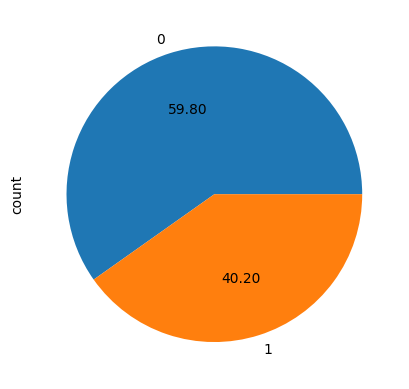

In [7]:
cars['Purchased'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: xlabel='count', ylabel='Gender'>

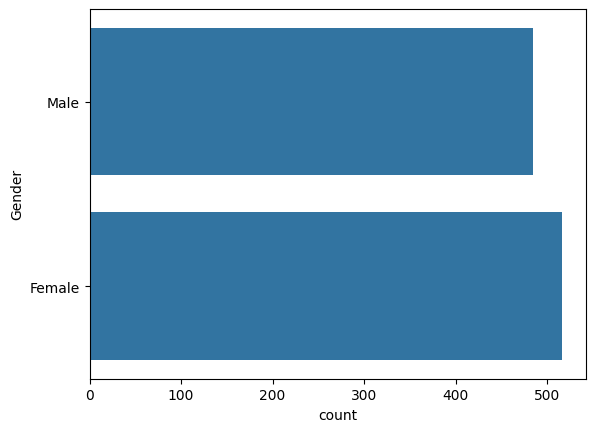

In [8]:
sns.countplot(cars['Gender'])

(array([114., 210., 340., 213., 123.]),
 array([18., 27., 36., 45., 54., 63.]),
 <BarContainer object of 5 artists>)

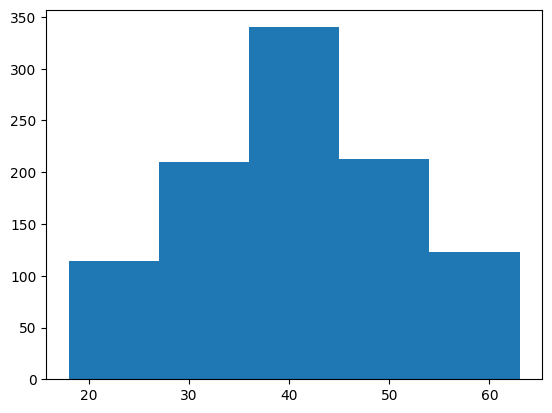

In [9]:
import matplotlib.pyplot as plt
plt.hist(cars['Age'],bins=5)

C:\Users\Arpit\AppData\Local\Temp\ipykernel_18856\2511136016.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['Age'])


<Axes: xlabel='Age', ylabel='Density'>

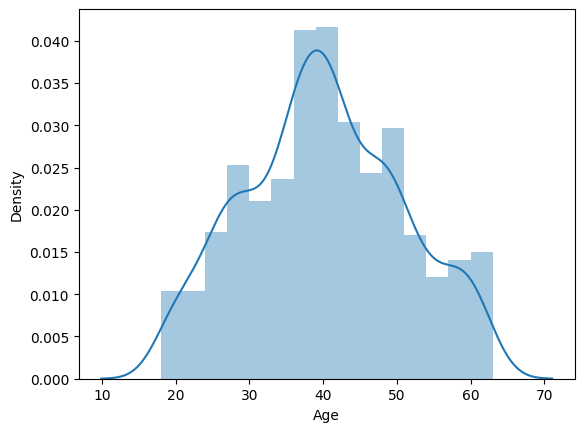

In [10]:
sns.distplot(cars['Age'])

<Axes: ylabel='Age'>

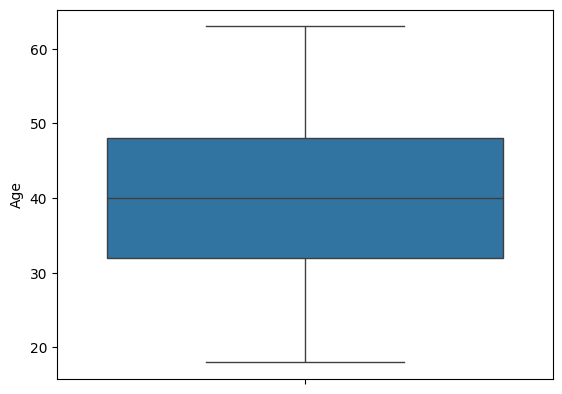

In [11]:
sns.boxplot(cars['Age'])

In [12]:
cars['Age'].skew()

np.float64(0.07868751311449813)

<Axes: xlabel='AnnualSalary', ylabel='Age'>

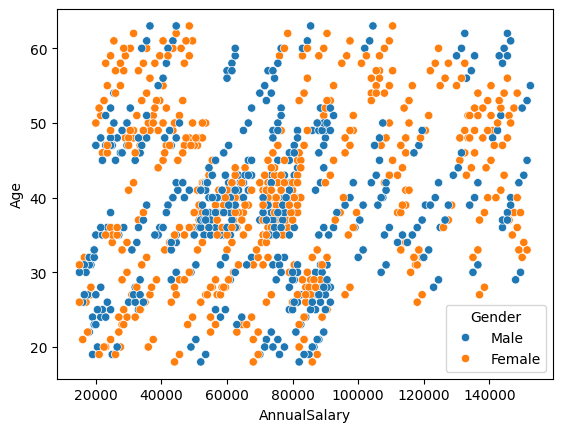

In [13]:
# Create scatter plot
sns.scatterplot(x='AnnualSalary', y='Age', hue='Gender', data=cars)

<Axes: xlabel='Purchased', ylabel='Age'>

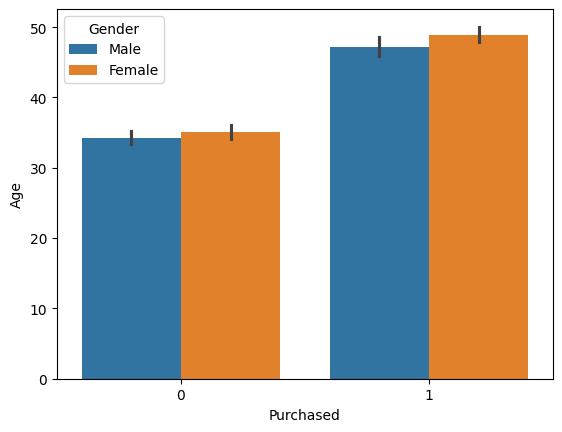

In [14]:
# Create bar plot
sns.barplot(x='Purchased', y='Age', hue='Gender', data=cars)

<Axes: xlabel='Gender', ylabel='Age'>

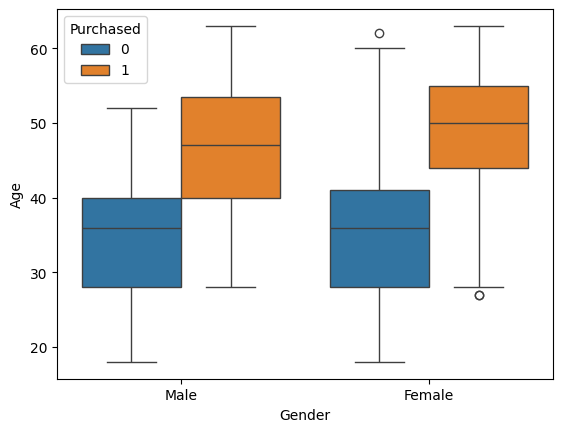

In [15]:

# Create box plot
sns.boxplot(x='Gender', y='Age', hue='Purchased', data=cars)

<Axes: xlabel='Purchased', ylabel='Gender'>

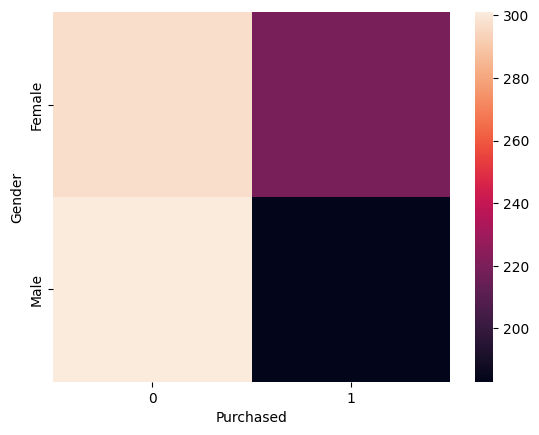

In [16]:
sns.heatmap(pd.crosstab(cars['Gender'],cars['Purchased']))

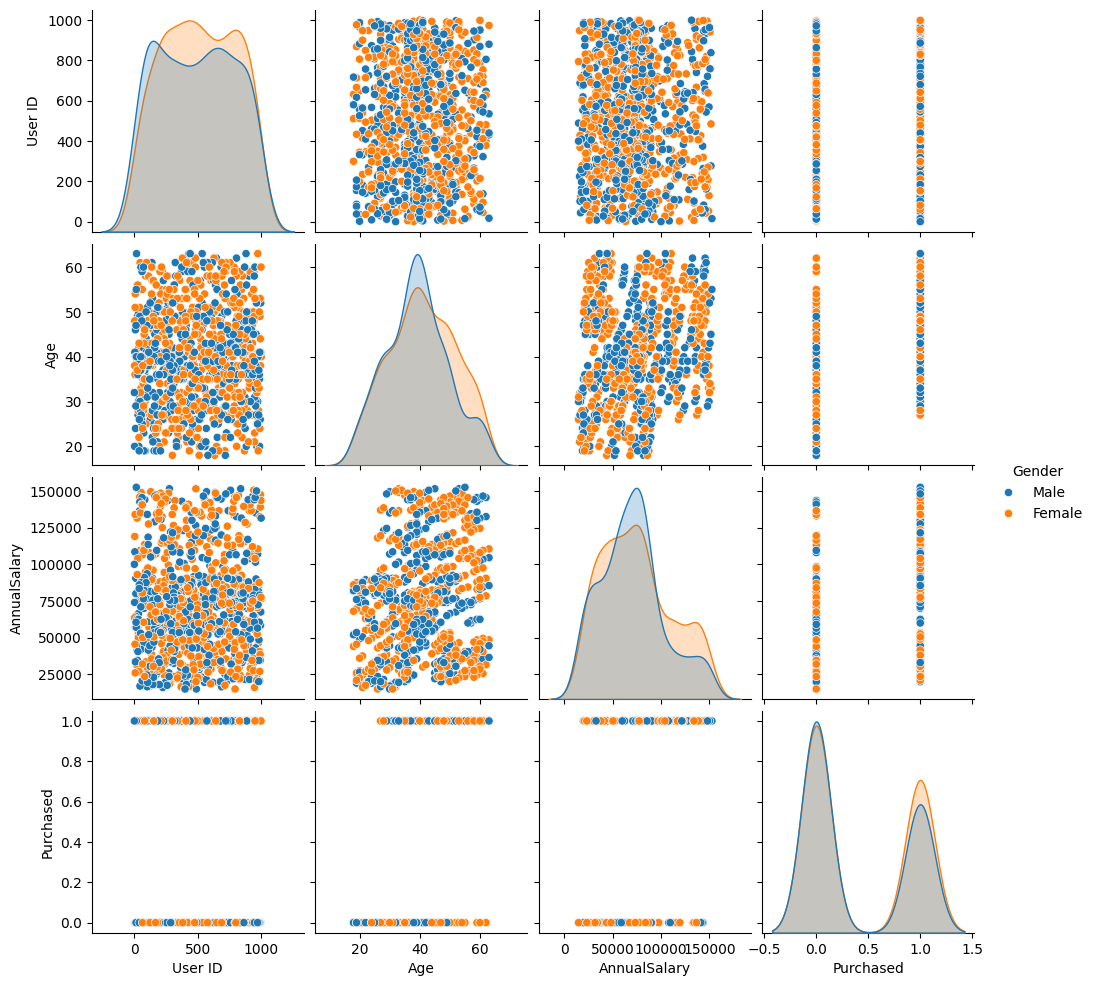

In [17]:
sns.pairplot(cars,hue='Gender')

In [18]:
!pip install pandas-profiling


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
# Generate random data
random_data = np.random.uniform(size=(600, 2))
# Create DataFrame
df = pd.DataFrame(random_data, columns=['x1', 'x2'])
# Display the first few rows of the DataFrame
df.head()


,x1,x2
0,0.672942,0.063697
1,0.312914,0.307237
2,0.406993,0.800899
3,0.622769,0.578016
4,0.552001,0.477266


<Axes: xlabel='x1', ylabel='x2'>

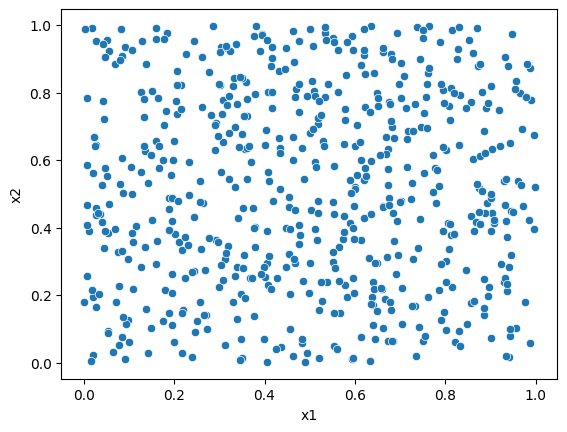

In [20]:
sns.scatterplot(x='x1', y='x2',data=df)

In [21]:
def testing(inputs):
    answer = int(np.sum(inputs) > 1)
    return answer

df['y'] = df.apply(testing, axis=1)

In [22]:
df.head()

,x1,x2,y
0,0.672942,0.063697,0
1,0.312914,0.307237,0
2,0.406993,0.800899,1
3,0.622769,0.578016,1
4,0.552001,0.477266,1


In [26]:
import matplotlib.pyplot as plt
plt.style.use('classic')

<Axes: xlabel='x1', ylabel='x2'>

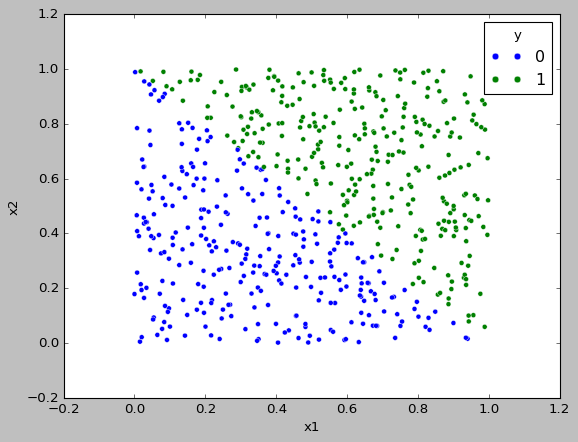

In [27]:
# Create scatter plot
sns.scatterplot(x='x1', y='x2', hue='y', data=df)

In [30]:
X=df[['x1','x2']]
Y=df['y']

In [31]:
X

,x1,x2
0,0.672942,0.063697
1,0.312914,0.307237
2,0.406993,0.800899
3,0.622769,0.578016
4,0.552001,0.477266
...,...,...
595,0.033748,0.201742
596,0.656195,0.616193
597,0.555774,0.279803
598,0.045012,0.722407


In [33]:
Y

0      0
1      0
2      1
3      1
4      1
      ..
595    0
596    1
597    0
598    0
599    0
Name: y, Length: 600, dtype: int64

In [36]:
def step(z):
    return 1 if z>0 else 0

In [37]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1300):
        j = np.random.randint(0,600)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

In [38]:
intercept_,coef_ = perceptron(X,Y)

In [39]:
print(coef_)
print(intercept_)

[0.73571616 0.66454052]
-0.5999999999999999


In [40]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [43]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

InvalidIndexError: (slice(None, None, None), 0)

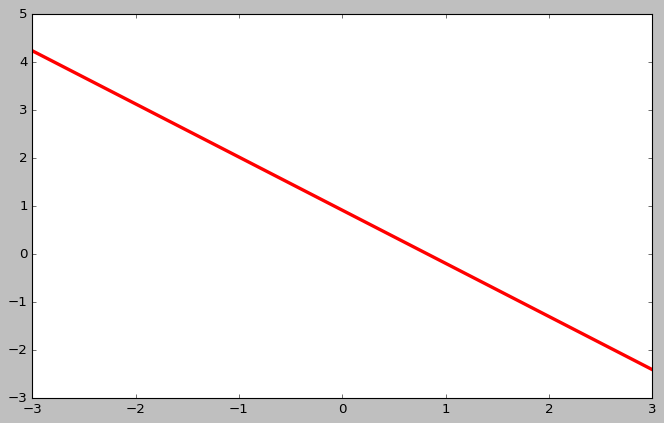

In [44]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [45]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=15)

In [46]:
X.shape

(100, 2)

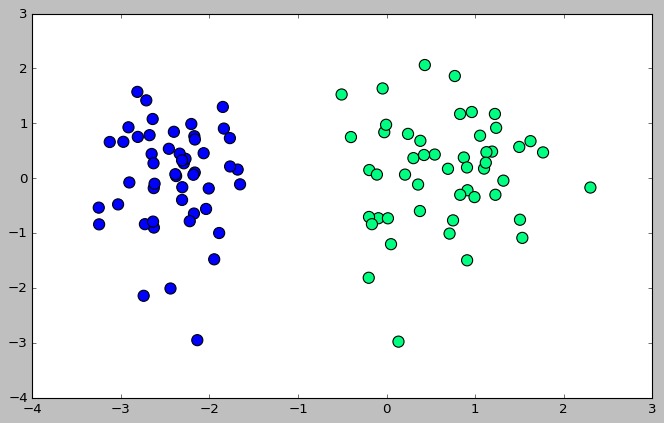

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [48]:
def perceptron(X,y):
    
    w1=w2=b=1
    lr = 0.1
    
    for j in range(1000):
    
        for i in range(X.shape[0]):

            # check condition
            z = w1*X[i][0] + w2*X[i][1] + b

            if z*y[i] < 0:
                w1 = w1 + lr*y[i]*X[i][0]
                w2 = w2 + lr*y[i]*X[i][1]
                b = b + lr*y[i]
            
    return w1,w2,b
            

In [49]:
w1,w2,b = perceptron(X,y)

In [50]:
b

np.float64(1.3000000000000003)

In [51]:
m = -(w1/w2)
c = -(b/w2)

print(m,c)

-4.531321834268464 -5.851870329508209


(-3.0, 2.0)

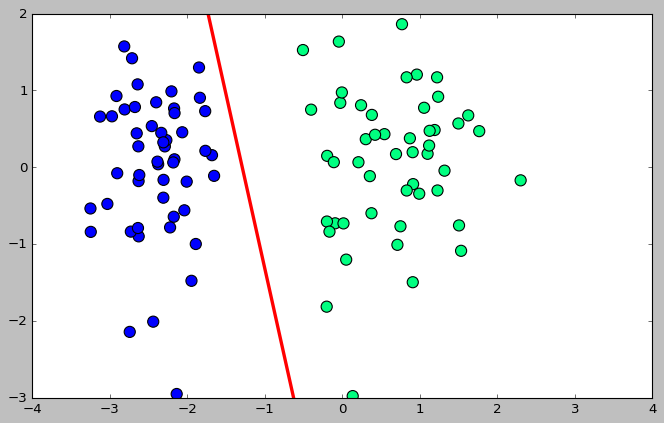

In [52]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + c

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)